# Méthode d'Euler pour l'intégration des équations différentielles ordinaires (EDO) en physique

![programme](img/programmeNumpy4.png)

## Systèmes dynamiques (simulations numériques)

Un système dynamique différentiel est une équation différentielle dans laquelle l'inconnue est une fonction vectorielle du temps, $t$, 
$$\vec{Y} : t \to \vec{Y}(t) \in \mathbb{R}^p$$
qui s'écrit sous la forme
$$\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} = f\left(\vec{Y}(t),t\right)$$

où $f$ est une fonction connue qui, à partir de l'état du système à l'instant $t$ (l'état étant entièrement défini par la donnée du vecteur $\vec{Y}(t)$), permet de calculer la dérivée de $\vec{Y}$ à l'instant $t$.

> Lorsque la fonction $f$ est suffisamment *régulière* (cf [problème de Cauchy](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_Cauchy)), il existe une unique solution pour une condition initiale définie à la date $t_0$ par :

$$\vec{Y}(t=t_0) = \vec{C_0}, \quad \textrm{ le vecteur } \vec{C}_0 \, \textrm{étant donné}$$


**Méthode d'Euler (explicite):**

Il s'agit d'une méthode de résolution approchée qui se base sur le développement limité à l'ordre 1 de la dérivée de la fonction $\vec{Y}(t)$, soit :

$$\vec{Y}(t+h) = \vec{Y}(t) + h\times \left.\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} \right|_t+o(h)$$
Soit 
$$\boxed{\vec{Y}(t+h) \approx \vec{Y}(t) + h\times f\left(\vec{Y}(t),t) \right)}$$

On peut également voir cette relation comme l'approximation "*à gauche*" de la dérivée, soit
$$\left.\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} \right|_{t} \approx \frac{f(t+h)-f(t)}{h}$$
**Principe :**

> A partir de la date initiale $t_0$, On construit une grille de dates $t_n$ uniformément réparties et séparées d'un pas de temps $h$ "petit" :
$$t_n = t_0 + n.h \quad \textrm{ "instants d'échantillonnage" }$$
> Pour chaque date, on approche la valeur de $\vec{Y}(t_n)$ par 
$$\vec{Y}(t_n) \approx \vec{Y}_n$$
où $\vec{Y}_n$ est le terme d'indice $n$ d'une suite définie par récurrence selon:

$$\forall n \in \mathbb{N},\quad\vec{Y}_{n+1} = \vec{Y}_{n} + h\times f \left( \vec{Y}_{n},t_n\right) \quad \textrm{et} \quad \vec{Y}_0 =\vec{C}_0$$ 

## Exemple 1: équation différentielle linéaire d'ordre 1

### Principe

Soit l'équation différentielle relative à la chute libre avec frottement proportionnelle au carré de la vitesse.

$$m \frac{\mathrm{d} v}{\mathrm{d}t} = -k |v|\times v-mg$$
avec la condition initiale $v(t=0)=v_0$.

On peut mettre cette équation sous la forme suivante:

$$\frac{\mathrm{d} v}{\mathrm{d}t} = -\frac{k}{m} |v|\times v-g$$

soit $$\boxed{\frac{\mathrm{d} y}{\mathrm{d}t}=-\alpha |y|\times y-g}$$

avec $\alpha=k/m$ une constante positive et $y : t\mapsto y(t)=v(t)$ la fonction inconnue dont les valeurs pour $t\ge 0$.

On écrit donc, pour *$h$ suffisamment petit*,
$$\boxed{v(t+h) \approx v(t) + \left(\frac{\mathrm{d} v}{\mathrm{d}t} \right)\times h}$$

Soit, dans notre cas,

$$v(t+h) \approx v(t) + \left(-\alpha |v(t)|\times v(t)-g\right)\times h$$

### Mise en oeuvre

- On choisit un pas de temps $h$ de valeur suffisamment petite.

- On initialise à vide deux listes python contenant les dates $t_i$ et les valeurs $y_i=y(t_i)$ de la fonction pour chacun des dates $t_i$.

- On réalise une boucle en remplissant les listes python successivement : à la manière définie par récurrence, la valeur de $y_{i+1}$ dépend de la valeur précédente $y_i$, éventuellement de la date $t_i$, et de paramètres physiques (masse, constante de frottement, etc...).

In [3]:
import numpy as np

## Méthode d'Euler explicite : chute libre avec "frottements en v^2"
## Utilisation de listes Python

# constantes physiques du problème
k = 4.4e-3 # uSI
m = 1.0    # kg
g = 9.81   # m.s^-2
alpha = k/m # constante physique intervenant dans l'équation différentielle
t0, v0 = 0, 1 # conditions initiales t0 = 0, v0 = 1 m/s

# initialisation des listes 
ti, vi = [], [] # liste de dates et vitesses
ti.append(t0) # date initale nulle
vi.append(v0) # vitesse initiale non nulle

# paramètres de la simulation
tf = 15 # durée totale de simulation (en s)
h = 1e-3 # pas de temps = 1 milli seconde

# date t, vitesse v et indice i dans la boucle
t = ti[0] # date initiale
v = vi[0] # vitesse initiale
i = 0 # indice courant

# boucle while
while (t < tf): # on continue tant que la date finale n'est pas atteinte
    i += 1 # incrémentation du compteur
    t = t0 + i*h # date actuelle
    ti.append(t) # ajout de la date actuelle dans la liste
    
    v = v +(-alpha*np.abs(v)*v-g)*h # approximation de v(t+h) = v(t) + dv/dt * h
    vi.append(v) #

Text(0, 0.5, 'v (m/s)')

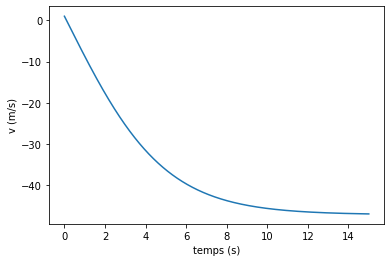

In [4]:
import matplotlib.pyplot as plt
plt.plot(ti,vi)
plt.xlabel('temps (s)')
plt.ylabel('v (m/s)')

### Détermination de la coordonnée z(t)

On utilise à nouveau l'approximation de la dérivée première lorsque $h$ est *suffisamment petit*:

$$v(t) = \frac{\mathrm{d}z}{\mathrm{d}t} \approx \frac{z(t+h)-z(t)}{h}$$

Soit $$z(t+h) \approx z(t) + h\times v(t)$$

On discrétise donc l'évolution temporelle de la grandeur $z(t)$ à l'aide du schéma numérique suivant:

$$z_i=z(t_i)$$

Soit $$z_{i+1} = z(t_{i+1}) = z(t_i +h) \approx z(t_i) + h\times v(t_i)$$

Le schéma numérique discret est le suivant:
$$z_{i+1}\approx z_i+h \times v_i$$

In [5]:
## Calcul des positions à partir des vitesse

## Condition initiale
z0 = 0 # position initiale à l'instant initial t = t0

# initialisation de la liste
zi=[] # liste de la coordonnée z
zi.append(z0) # valeur initiale
z = z0 # coordonnée courante

for k in range(1,len(ti)): # pour toutes les autres dates
    z = z + h * vi[k-1] # attention au décalage d'indice ! 
    zi.append(z) # ajout dans la liste

 à la date t=  10.0  v =  -45.69869938380528 z =  -313.4603562921219


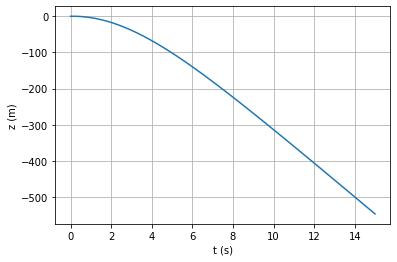

In [6]:
plt.plot(ti,zi)
plt.xlabel('t (s)')
plt.ylabel('z (m)')
plt.grid()
k0 = int(10/h)
print( " à la date t= ", ti[k0], " v = ", vi[k0], "z = ",zi[k0])

### Le problème du choix du pas de temps

Plus le pas de temps est faible, meilleure est l'approximation de la dérivée.

Toutefois, un pas de temps trop petit engendre:

- d'une part un temps de calcul élevé

- d'autre part, des nombreuses petites erreurs d'arrondis (ces erreurs résultent du fait que les nombres réels possèdent une réprésentation machine avec une précision limitée), qui engendrent, lorsqu'elles s'additionnent,  une erreur significative.

**Méthode pour déterminer la valeur à donner au pas de temps**

On détermine le **temps caractéristique $\tau_c$** du problème physique étudié : on peut pour cela s'appuyer sur une analyse dimensionnelle.

Par exemple, la chute libre avec frottement fait intervenir une vitesse limite $v_\mathrm{lim}$. Cette vitesse limite peut être combinée avec la constante de pesanteur $g$ de manière à construire une grandeur homogène à une temps caractéristique, notée $\tau_c$, selon
$$ \boxed{v_\mathrm{lim}=g\times \tau_c}$$

Le pas de temps $h$ doit être choisi de **manière à être petit devant $\tau_c$**.

On peut prendre $$h\approx \tau_c/100 \quad \textrm{ou} \quad h\approx \tau_c/1000$$

## Complément : autres méthodes d'intégration

**Méthode d'Euler implicite**

La méthode d'Euler *implicite* est une variante qui offre une meilleure stabilité numérique. Elle découle l'approximation "*à droite*" de la dérivée selon :
$$\left.\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} \right|_{t+h} \approx \frac{f(t+h)-f(t)}{h}$$

Elle conduit à une relation de récurrence **plus difficile** à gérer :
$$\forall n \in \mathbb{N},\quad\vec{Y}_{n+1} = \vec{Y}_{n} + h\times f \left( \vec{Y}_{n+1},t_n\right) \quad \textrm{et} \quad \vec{Y}_0 =\vec{C}_0$$ 
En effet, le terme au rang suivant, $\vec{Y}_{n+1}$, apparait simulatément dans le membre de gauche mais aussi dans le membre de droite de l'équation. En pratique, on utilise une méthode numérique pour trouver la racine de l'équation (du type résoudre $f(x)=0$).

**Méthodes d'ordres supérieurs**

La méthode d'Euler (qu'elle soit implicite ou explicite) est une méthode d'ordre 1.

On peut utiliser une approximation de la dérivée à un ordre supérieur (ordre 2, 3 ou 4 par exemple).

Les calculs sont certes plus complexes mais les avantages sont nombreux : pour un ordre $n=4$, si le pas de temps est divisé par $10$, la précision de la méthode est améliorée d'un facteur $10^n=10^4$.

**Pas adaptatifs**

De plus, il existe des **méthodes à pas adaptatifs** qui permettent d'optimiser *"automatiquement"* la valeur du pas de temps de manière:
- à "ralentir" en diminuant le pas de temps lorsque le système physique évolue brusquement 
- à "accélérer" lorsqu'au contraire le système physique évolue lentement et qu'un grand pas de temps peu être utilisé.

L'étude théorique de ces méthodes n'est pas au programme mais les outils numériques sont disponibles via la fonction *odeint* du module *scipy.integrate*.


# Généralisation : la méthode d'Euler vue comme "intégrateur"


Pour mettre en oeuvre la méthode d'Euler en Python, il faut se donner :

1) un problème physique, c'est à dire une fonction d'évolution $f$ qui définit l'équation différentille $\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} = f(\vec{Y}(t),t)$

2) les conditions initiales, $t_0$ et $\vec{C}_0$, telles que $\vec{Y}(t=t_0)=\vec{C}_0$

3) *l'intégrateur*, c'est à dire la méthode de résolution approchée elle-même, et ses paramètres :
 + valeur du pas de temps $h$ ,
 + et la date finale de la résolution $t_f$.
 
 Nous reprenons l'exemple précédent de manière plus formelle.

## Etape (1) : conception de *l'intégrateur*

Principe : 
c'est une fonction Python qui reçoit comme **arguments d'entrée** : 

+ la fonction d'évolution ``f``, telle que ``f(Y,t)`` donne la dérivé de $\vec{Y}$ à la date $t$
+ la condition $\vec{C_0}$, un vecteur colonne de dimension $p$
+ le pas d'espace $h$, la date initiale $t_0$ et la date finale $t_f$.

et qui **renvoie** :

+ la liste ``tList`` des $N+1$ dates $t_n=t_0, t_1, \ldots, t_N$,
+ l'ensemble des valeurs approchées $\vec{Y}_n$ sous la forme d'une liste ``yList`` de ``ndarray`` de dimension $p$ :


In [7]:
import matplotlib.pyplot as plt
import numpy as np
def integEulerExp(f, C0, h = 1e-3, t0 = 0, tf = 1.): #Euler
    # remarque : f(Y,t) renvoie le vecteur dérivé en tant que ndarray
    t, y = t0, C0 # date et état initial
    tList = [t]   # initialisation de la liste des dates tn
    yList = [y]   # initialisation de la liste des Yn
    while t<tf :  # condition d'arret
        yNext = y + h * f(y,t) # équation d'évolution
        y = yNext # on passe au terme Yn suivant
        t = t + h # on passe à l'instant suivant
        tList.append(t) # ajoute la date tn dans  tList
        yList.append(y) # ajoute le vecteur Yn dans ylist
    return tList,yList    

## Etape (2) : choix d'un problème physique.

Exemple 1 : attraction de Lorenz

On cherche $x(t)$, $y(t)$ et $z(t)$, solution des équations différentielles couplées suivantes:
$$\left\{\begin{array}{rcl}
\frac{\textrm{d}x}{\textrm{d}t} & = & \sigma \left(y(t) - x(t) \right) \\
\frac{\textrm{d}y}{\textrm{d}t} & = & \rho x(t) - y(t) -x(t) z(t) \\
\frac{\textrm{d}z}{\textrm{d}t} & = & x(t) y(t) - \beta z(t) \\
\end{array} \right.$$

avec $\sigma = 10, \beta = 8/3$ et  $\rho = 28$.

**Définition de la fonction d'évolution en Python**

Il faut écrire une fonction Python ``Lorenz(Y,t)`` qui reçoit le vecteur ``Y``$=\vec{Y}$ à l'instant $t$,

$$\vec{Y}(t) = \left\{\begin{array}{c}
x(t) \\ y(t) \\ z(t) \\
\end{array} \right.\quad \textrm{ soit, en Python }  \quad
\textrm{Y} = \left\{\begin{array}{c}
\textrm{x} \\ \textrm{y} \\ \textrm{z} \\
\end{array} \right.$$

et renvoie le vecteur dérivé ``dY``$=\frac{\textrm{d}\vec{y}}{\textrm{d}t}$ dont les coordonnées en Python sont les trois variables ``dx``, ``dy`` et ``dz`` :
$$\frac{\mathrm{d}\vec{Y}}{\mathrm{d}t} = \left\{\begin{array}{c}
\dot{x}(t) \\ \dot{y}(t) \\ \dot{z}(t) \\
\end{array} \right. \quad \textrm{ soit, en Python }  \quad
\textrm{dY} = \left\{\begin{array}{c}
\textrm{dx} \\ \textrm{dy} \\ \textrm{dz} \\
\end{array} \right.$$

In [8]:
sigma, beta, rho = 10.,8./3,28. # flottants donnés
def lorenz(Y,t) : # squelette imposé par l'intégrateur, 
                  # Y est de type ndarray
    x, y, z = Y # unpack de Y :  x, y et z sont des ndarray
    dx = sigma * (y - x)
    dy = rho * x - y - x * z
    dz = x * y - beta * z
    return np.array([dx, dy, dz]) # packing pour faire un ndarray

## Etape (3) : lancement de la simulation ( = résolution du système différentiel )

On cherche à construire l'ensemble des valeurs prises par le vecteur $$\vec{Y}(t)$$ pour $t\in[0;tf]$ pour l'attracteur de Lorenz avec :

+ comme condition initiale $\vec{C}_0 = ( 1, 0 ,0 )$, 
+ et comme paramètres d'intégrateur ``h = 1e-3`` et ``tf = 5``.

Il suffit d'appeler la fonction ``integEulerExp(f,C0,h,t0,tf)`` où l'argument ``f`` est la fonction ``lorenz`` que l'on vient de définir précédemment.

La fonction ``integEulerExp`` renvoie le *tuple* ``tList,yList`` contenant :

+ la liste des dates $t_n$ ,
+ la liste des vecteurs $Y_n$ pour chacune de ces dates.

In [9]:
C0 = np.array([1, 0 ,0]) # condition initiale = tableau Numpy de type ndarray
tList, yList = integEulerExp(lorenz ,C0 , h = 1e-3, t0 = 0, tf = 50 )

Affichage de la trajectoire du point $M(t)$ dont les coordonnées $(x(t), y(t), z(t))$ sont les composantes du vecteur $\vec{Y}(t)$.

Pour cela :

1. on convertit les listes de vecteurs ``tList`` et ``yList`` en matrices (*ndarray*), ce qui permet d'extraire aisément les colonnes :
Nous avons converti la liste ``yList`` renvoyées par l'intégrateur en matrice de $(N+1)$ lignes par $p=4$ colonnes.

![systemeDynamique](img/systemeDynamiqueData3.png)

  + La 1ère colonne donne les coordonnées $x$ aux dates $t_n$, $x(t_n)$
  + La 2ème colonne donne les coordonnées $y$ aux dates $t_n$, $y(t_n)$
  + La 2ème colonne donne les coordonnées $z$ aux dates $t_n$, $z(t_n)$
  

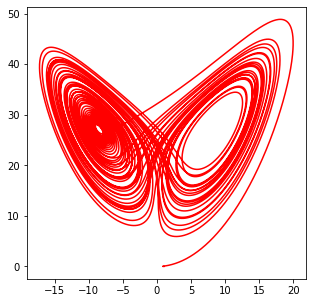

In [10]:
plt.rcParams["figure.figsize"] = (5, 5) #
Yi = np.array(yList) # conversion en matrice de N+1 lignes et 3 colonnes
xi = Yi[:,0] # 1ère colonne => coordonnée x
yi = Yi[:,1] # 2ème colonne => coordonnée y
zi = Yi[:,2] # 3ème colonne => coordonnée z
plt.plot(xi,zi,'r') # projectionperpendiculairement à y
plt.show()

# La fonction *odeint* de la toolbox scipy.integrate

## Mode d'emploi de odeint

Observons l'exemple ci-dessous


In [25]:
## EXEMPLE EXTRAIT DE LA DOCUMENTATION # help(odeint)
from scipy.integrate import odeint
b, c = 0.25, 5.0
def pend(y, t):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt
y0 = [np.pi - 0.1, 0.0]
ti = np.linspace(0, 10, 101) #
sol = odeint(pend, y0, ti) # odeint(f, y0, ti)

On constate que l'on a préalablement défini la **fonction d'évolution**, $f(y,t)$ qui:
+ au VECTEUR $\vec{Y}(t)$ et à la date $t$
+ renvoie le VECTEUR dérivé $\frac{\mathrm{d} \vec{Y}}{\mathrm{d} t}$

1) La fonction d'évolution, appelée *pend*, est le **premier des arguments** transmis à la fonction odeint.

ATTENTION : la fonction *pend* est passée comme argument de la fonction ``odeint``. Il ne s'agit nullement d'appeler la fonction *pend* c'est pourquoi il ne faut pas mettre de parenthèses après *pend*. 

2)Le **second argument** transmis à *odeint* est le vecteur des conditions initiales, appelé *y0* dans l'exemple. Ce vecteur peut être un ndarray (tableau numpy) ou une liste Python contenant autant de valeurs numériques que la dimension du vecteur $\vec{Y}$.

3) Le **troisième argument** est la liste des dates $t_i$ pour lesquelles on souhaite que l'intégrateur renvoie les valeurs du vecteur $\vec{Y}(t_i)$

La fonction *odeint* renvoie alors un tableau Numpy, ici stockée dans la variable *sol*. Il s'agit d'un tableau à deux dimensions:

+ le nombre de lignes est égal au nombre de valeurs de date $t_i$
+ le nombre de colonnes est égal à la dimension du vecteur $\vec{Y}$.


In [24]:
sol.shape # 101 lignes et 2 colonnes

(101, 2)

**Comment récupère-t-on le résultat du calcul ?**

La *ième* ligne de la variable *sol* contient donc les composantes du vecteur $\vec{Y}(t_i)$.

Pour accéder aux valeurs de la **première composante** du vecteur, on écrit:
```
thetai = sol[:,0] # extraction de la 1ère colonne, celle d'indice zéro
```

Pour accèder à l'ensemble des valeurs de la **seconde composante** du vecteur, on écrit:
```
omegai = sol[:,1] # extraction de la 2ème colonne, celle d'indice un
```

## Application : oscillateur non linéaire

Soit l'équation différentielle

$$mL\frac{\mathrm{d}^2 \theta}{\mathrm{d} t^2} + \alpha L \frac{\mathrm{d} \theta}{\mathrm{d} t}+mg\sin(\theta)=0$$

Avec les conditions initiales
+ $\theta(t=0) =\theta_0=170\textrm{°}$ 
+  $\dot{\theta}_0 = 0$

On donne $m= 150\, \mathrm{g}$, $L=1 \, \mathrm{m}$, $\alpha = 0,2 \, \mathrm{uSI}$, $g=9,81 \, \mathrm{m.s}^{-2}$.
On souhaite utiliser *odeint* pour résoudre numériquement l'équation différentielle.

### Etape 1 : vectorisation.

Principe: on exprimer la dérivée seconde de la variable $\theta$ en fonction de la dérivée d'ordre inférieur et de $\theta$

$$\frac{\mathrm{d}^2 \theta}{\mathrm{d} t^2} = -\frac{\alpha}{m} \frac{\mathrm{d} \theta}{\mathrm{d} t} -\frac{g}{L} \sin(\theta)$$

On peut écrire:
$$\omega = \frac{\mathrm{d} \theta}{\mathrm{d} t} = \dot{\theta}$$
et
$$\frac{\mathrm{d} \omega}{\mathrm{d} t} = -b \omega -c \sin(\theta)$$

avec $b=\frac{\alpha}{m}$ et $c=\frac{g}{L}$

On introduit donc le vecteur $\vec{Y}$ tel que
$$\vec{Y}(t) = \left\{\begin{array}{c}
\theta(t) \\ \omega(t) \\
\end{array} \right. \quad \textrm{ soit, en Python }  \quad
\textrm{Y} = \left\{\begin{array}{c}
\textrm{theta} \\ \textrm{omega} \\ \end{array} \right.$$

Et on a 

$$\frac{\mathrm{d}\vec{Y}}{\mathrm{d}t} = \left\{\begin{array}{c}
\frac{\mathrm{d}\theta}{\mathrm{d}t} = \omega \\ 
\frac{\mathrm{d}\omega}{\mathrm{d}t}= -b \omega -c \sin(\theta)\\
\end{array} \right. \quad \textrm{ soit, en Python }  \quad
\textrm{dY} = \left\{\begin{array}{c}
\textrm{dtheta}=\textrm{omega} \\ \textrm{domega}=-b\times \textrm{omega} -c \sin(\mathrm{theta}) \\ \end{array} \right.$$

La fonction func à définir est donc exactement la fonction *pend* qui a été précédemment définie. Elle se compose comme suit.

In [29]:
def pend(y, t):
    theta, omega = y # unpack du vecteur y pour récupérer les composantes theta et omega
    dtheta = omega # dérivée de la première composante
    domega = -b*omega - c*np.sin(theta) # dérivée de la seconde composante
    return [dtheta, domega] # renvoie du vecteur résultat

### Etape 2 : Appel de la fonction odeint avec les conditions initiales et paramètres d'évolution

In [44]:
## Conditions initiales
y0 = [170*np.pi/180 , 0] # theta0 , omega0

## paramètres physiques
m, L, alpha, g = 0.15, 1., 0.2, 9.81 # kg, m, uSI, m/s2
b, c = alpha/m, g/L # paramètres b, c

## intervalle de temps
ti = np.linspace(0,10,101) # durée 10s de simulation, 

## appel à odeint proprement dit
Yi = odeint(pend, y0, ti)

### Tracé graphique des solutions

**Evolution temporelle des variables $\theta$ et $\omega$**

Text(0, 0.5, 'omega (rad/s)')

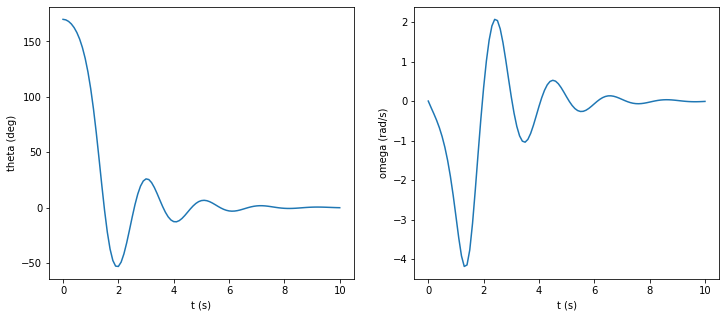

In [45]:
thetai = Yi[:,0] # 1ère colonne
omegai = Yi[:,1] # 2ème colonne
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(ti, thetai*180/np.pi) # theta en fonction du temps
plt.xlabel('t (s)')
plt.ylabel('theta (deg)')
plt.subplot(122)
plt.plot(ti, omegai) # omega, vitesse engulaire en fonction du temps
plt.xlabel('t (s)')
plt.ylabel('omega (rad/s)')

**Représentation de la trajectoire**

Les coordonnées $x(t)$ et $y(t)$ sont données par 

$x(t) = L \sin(\theta)$ et $y(t) = -L \cos(\theta)$

(-0.8910040787827465,
 1.0899106108429515,
 -1.0992403875932444,
 1.0840481406600868)

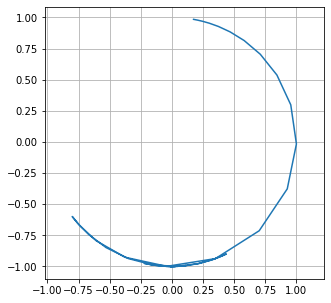

In [49]:
## ATTENTION : ne pas confondre yi et Yi ! 
xi = L* np.sin(Yi[:,0]) 
yi = -L*np.cos(Yi[:,0])
plt.plot(xi,yi)
plt.grid()
plt.axis('equal') # la trajectoire est inscrite dans un cercle

# Autre exemple : système mécanique à deux degrés de liberté

Système mécanique non-linéaire à deux degrés de libertés.

On considère un pendule constitué d'une masse reliée à une tige élastique de longueur au repos $L$, qui agit comme un ressort de raideur $k$. Le pendule est lâché à partir d'une position horizontale.

![penduleRessortSchema](img/penduleRessortSchema2.png)

Les équations du mouvement sont :

$$\left\{\begin{array}{rcl} \ddot{r} -r\dot{\theta}^2 & = &-\frac{k}{m}(r-L) + g \cos \theta \\
r \ddot{\theta} +2\dot{r}\dot{\theta} &= &-g \sin \theta \end{array} \right.$$

On considère le vecteur $$\vec{Y}(t) = 
\left(\begin{array}{c} r \\ \dot{r} \\ \theta \\ \dot{\theta} \end{array}\right)$$

+ écrire les équations du mouvement sous la forme d'un système dynamique
$$\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} = f\left(\vec{Y}(t),t\right)$$

**Solution :** 

Le but est d'obtenir les coordonnées de la dérivée de $\vec{Y}$ en fonction des coordonnées de $\vec{Y}$ et du temps $t$.

En isolant les dérivées secondes, on obtient : $$\left\{\begin{array}{rcl} \ddot{r} & = &r\dot{\theta}^2 -\frac{k}{m}(r-L) + g \cos \theta \\
\ddot{\theta} &= & \frac{1}{r} \left(-2\dot{r}\dot{\theta} -g \sin \theta \right) \end{array} \right.$$

En notant le vecteur $\vec{Y}$ en ligne 

$$\vec{Y}=(\textrm{r},\textrm{rp},\textrm{theta},\textrm{thetap})$$ et les coordonnées de sa dérivée par rapport au temps, 

$$d\vec{Y} = (\textrm{dr},\textrm{drp},\textrm{dtheta},\textrm{dthetap})$$ 

On a donc :

$$\left\{\begin{array}{rcl} \textrm{dr} &= &rp\quad \textrm{car} \, \dot{r} = \dot{r} \\ 
\textrm{drp} & = & \textrm{r}.\textrm{thetap}^2 -\frac{k}{m}(\textrm{r}-L) + g \cos (\textrm{theta}) \\
\textrm{dtheta} & =& \textrm{thetap} \\
\textrm{dthetap} &= & \frac{1}{\textrm{r}} \left(-2\textrm{rp}\times\textrm{thetap}-g \sin \textrm{theta} \right) 
\end{array} \right.$$

Voici la fonction correspondante pour laquelle les paramètres du système physique ($m =$ 1 kg, $L = 1$ m et $k = 6$ N.m$^-1$) sont définis en unités SI.

In [1]:
m,k,L,g = 1.,6., 1., 9.81 # en kg, N/m, m et m.s^-2
def pendule(Y,t) : # la forme de la fonction d'évolution est imposée
    # Y est un vecteur de type ndarray
    r,rp,theta,thetap = Y # unpack des coordonnées
    dr = rp
    drp = r*thetap**2 - k/m*(r-L)+g*np.cos(theta)
    dtheta = thetap
    dthetap =(-2*rp*thetap-g*np.sin(theta))/r
    return np.array([dr,drp,dtheta, dthetap]) # on retourne un ndarray

In [ ]:
# script pour le calcul
k=4.5
t0 = 0
C0 = np.array([1.,0.,np.pi/2,0])
tn,Yn=integEulerExp(pendule,C0,h=5e-3,tf=10)

In [ ]:
tn = np.array(tn) # conversion en ndarray
Yn = np.array(Yn) # conversion en ndarray

Nous avons converti la liste ``yList`` renvoyées par l'intégrateur en matrice de $(N+1)$ lignes par $p=4$ colonnes.

![systemeDynamique](img/systemeDynamiqueData3.png)

In [67]:
rn = Yn[:,0] # extraction de la distance r, 1ère colonne
thetan = Yn[:,2] # extraction de l'angle theta, 3ème colonne 

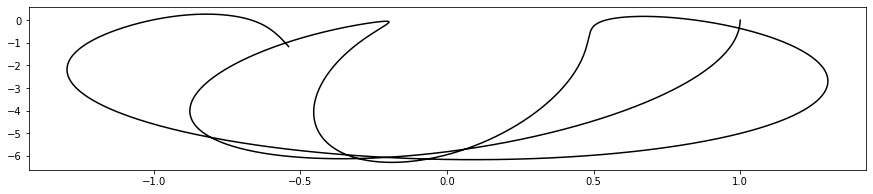

In [68]:
# coordonnées dans la base d'affichage x,y 
xn = rn*np.sin(thetan)
yn = -rn*np.cos(thetan) # ne pas confondre Yn et yn !
plt.plot(xn,yn,'-k') #  trajectoire

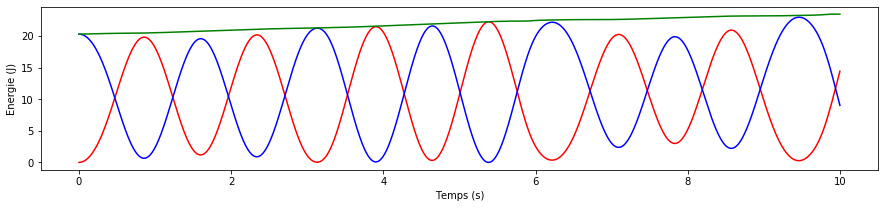

In [69]:
# Energie du système à chaque instant
vitesse2 = Yn[:,1]**2 + (Yn[:,0]*Yn[:,3])**2 # V^2=(dr/dt)^2 + (r .dtheta/dt)^2
Ecinetique = 0.5*m*vitesse2 # Energie cinétique 
Epot = 0.5*k*(Yn[:,0]-L)**2 -m*g*Yn[:,0]*np.cos(Yn[:,2]) # potentielle élastique + pesanteur
Epot = Epot - np.min(Epot) # normalisation pour que Epot = 0
plt.figure(figsize=(15,3))# Figure allonée
plt.plot(tn,Ecinetique,'-r')      # Energie cinétique en rouge
plt.plot(tn,Epot,'-b')            # Eenergie potentielle en bleu
plt.plot(tn,Epot+Ecinetique,'-g') # Energie totale en vert
plt.xlabel('Temps (s)')
plt.ylabel('Energie (J)')
plt.show()

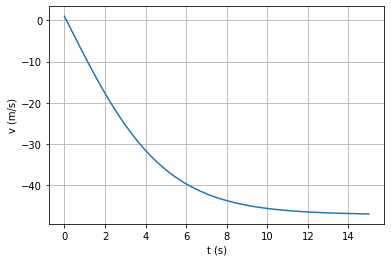

In [6]:
## Méthode d'Euler, chute libre : alternative avec numpy
import numpy as np
import matplotlib.pyplot as plt
## Méthode d'Euler explicite : chute libre avec "frottements en v^2"
## Utilisation de tableaux Numpy

# constantes physiques du problème
k = 4.4e-3 # uSI
m = 1.0    # kg
g = 9.81   # m.s^-2
alpha = k/m # constante physique intervenant dans l'équation différentielle

tf = 15
h = 1e-3
ti = np.linspace(0, tf, int(tf/h +1)) # une date toutes les 1 ms
vi = np.zeros(len(ti)) # mise à zéro
v = 1 # condition initiale v0 = 1 m/s
vi[0] = v

for k in range(1,len(ti)) : # boucle for à partir de la 2ème valeur
    vi[k] = v +  (-alpha*np.abs(v)*v-g)*h
    v = vi[k] # on passe au suivant

plt.plot(ti,vi)
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.grid()